In [1]:
#import library
import numpy as np #untuk klasifikasi array
import pandas as pd #untk data frame
import seaborn as sns #untuk visualisasi data
import matplotlib.pyplot as plt #untuk visualisasi data
from sklearn import metrics #metriks dari library sklearn

In [2]:
#EDA
telecom_df = pd.read_csv("telecom_churn.csv")
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [4]:
telecom_df.shape

(5000, 21)

In [5]:
#terdapat 5000 baris dan 21 kolom, 20 kolom prediktor dan 1 kolom 'class' ialah variabel target
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [6]:
telecom_df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

In [7]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [8]:
#tidak perlu encoding data karna semuanya int dan float: encoding untuk data categorical aja
#menghitung berapa nilai max dan mean dari total_day_minutes
telecom_df['total_day_minutes'].max() #pelanggan menelpon paling lama 351.5 menit per hari

351.5

In [9]:
telecom_df['total_day_minutes'].mean() #pelanggan menelpon rata-rata 180 menit per hari

180.2889

In [10]:
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


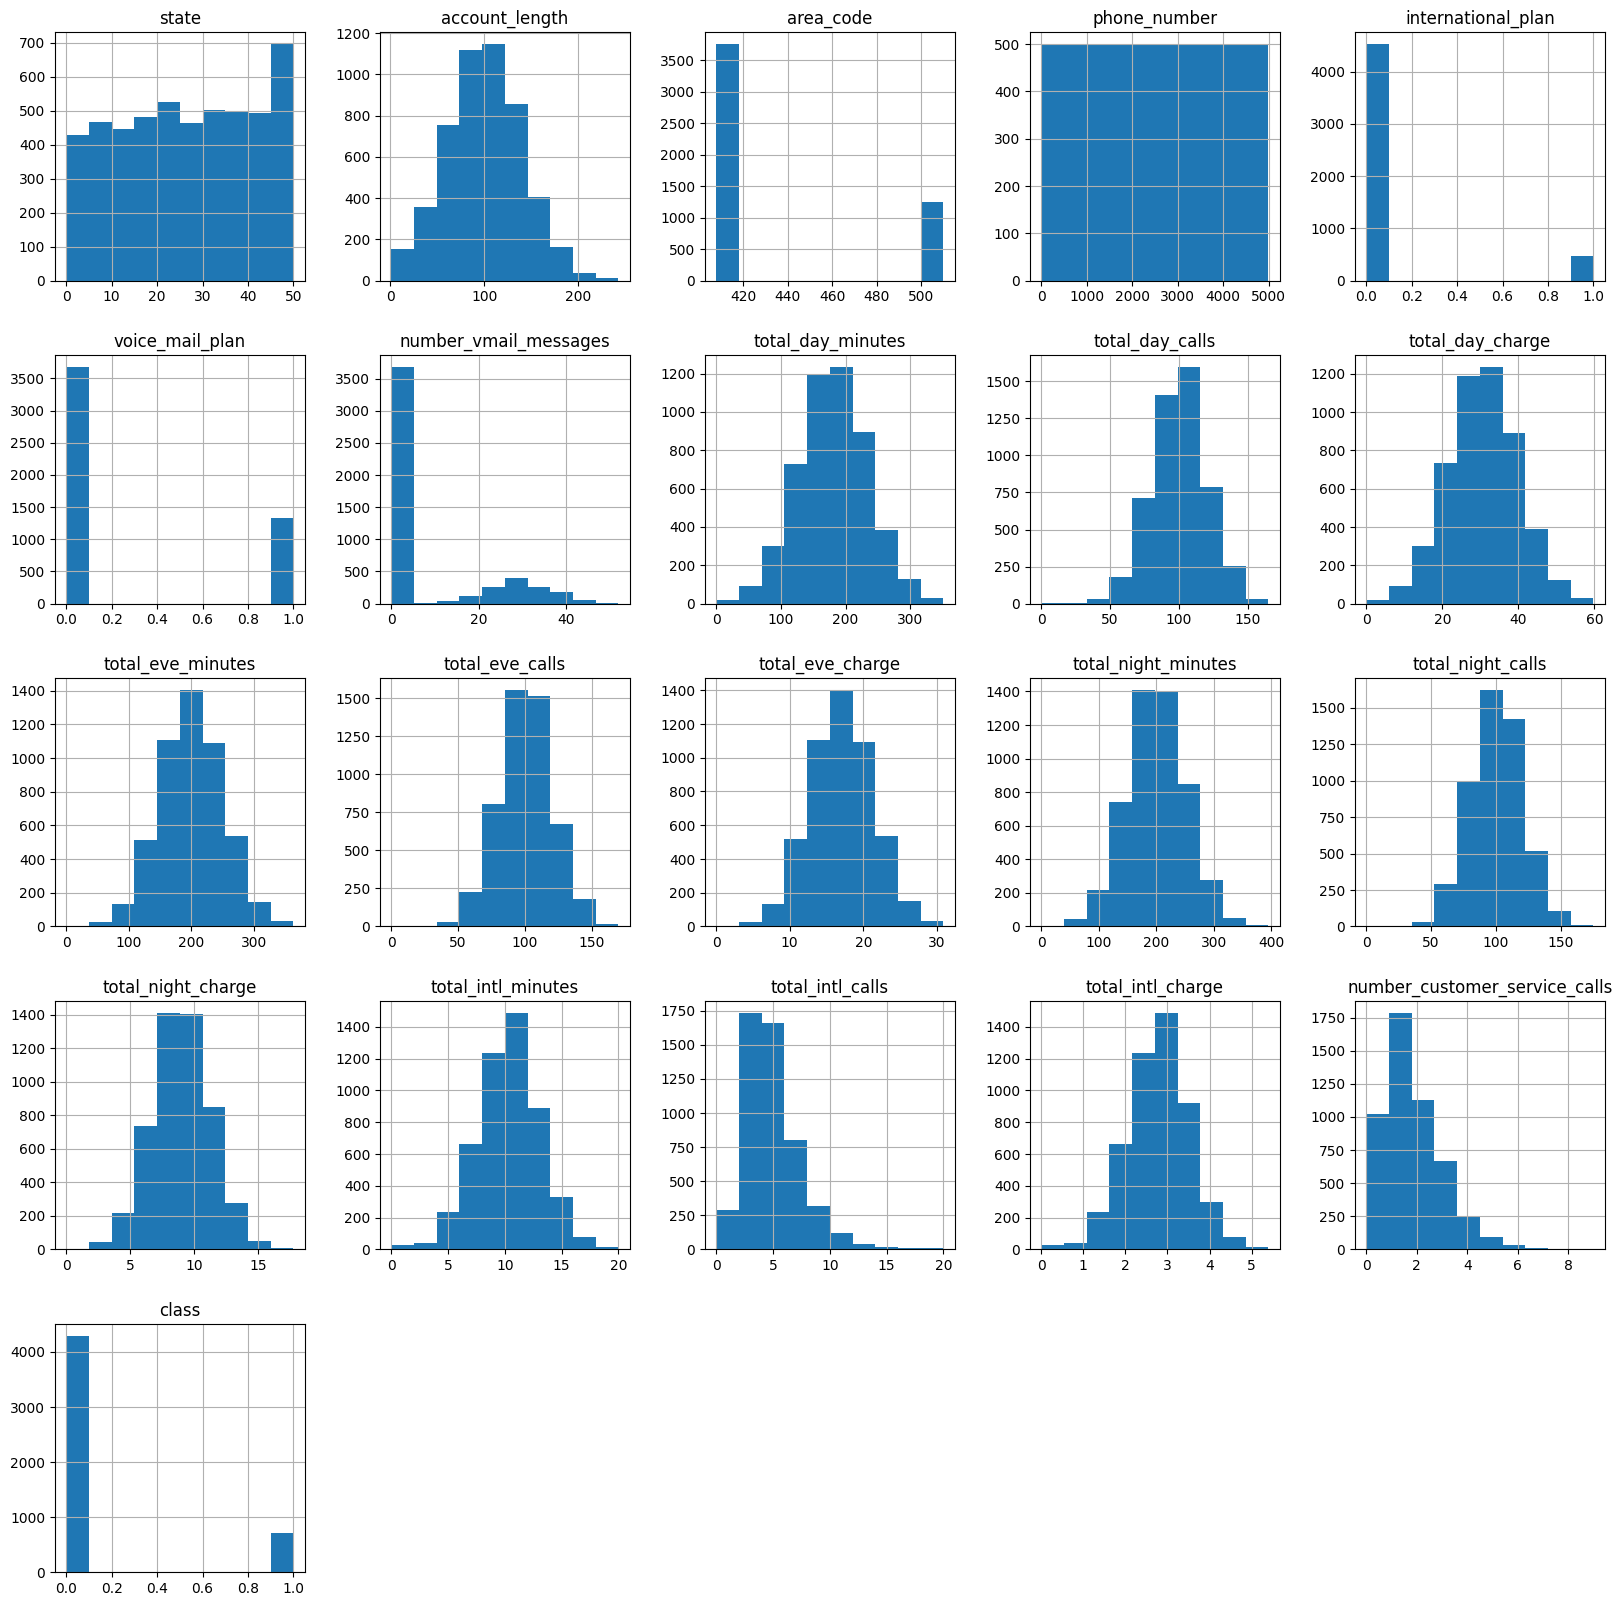

In [11]:
#melakukan visualisasi data distribusi masing-masing variabel
telecom_df.hist(figsize = (20,20))
plt.show()

In [12]:
#class = 1 berarti tdk berlangganan, sdgkn class =0 berarti berlangganan

#menghitung jumlah masing2 kelas
telecom_df['class'].value_counts() #ada 707 orang yang tdk berlangganan, sdgkn 4293 orang tetap berlangganan

0    4293
1     707
Name: class, dtype: int64

<Axes: ylabel='class'>

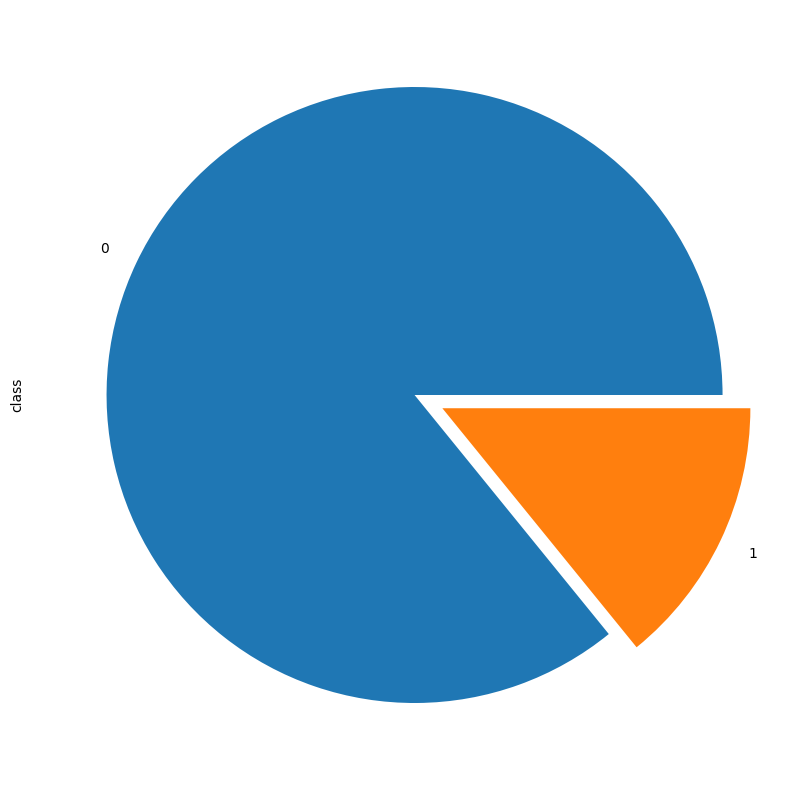

In [13]:
#plot pie chart
plt.figure(figsize = (10,10))
telecom_df['class'].value_counts().plot(kind = 'pie', explode = [0, 0.1])

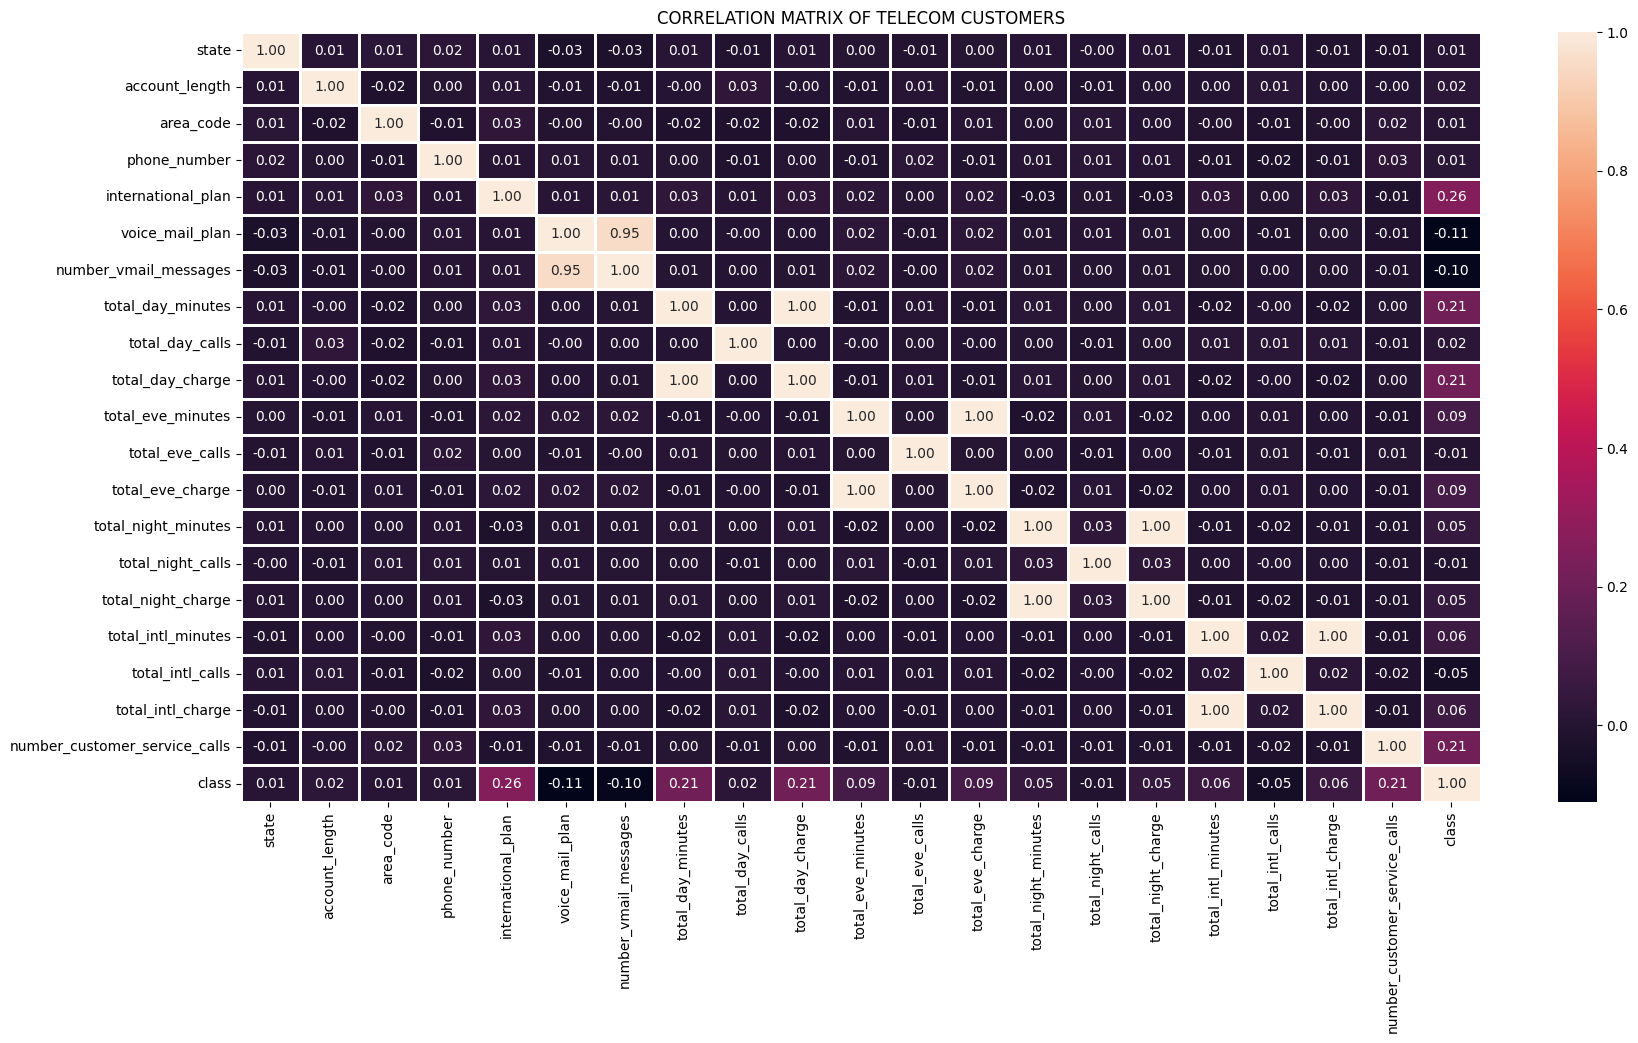

In [14]:
#plot matriks korelasi
plt.figure(figsize = (20, 10))
sns.heatmap(telecom_df.corr(), annot = True, fmt=".2f", linewidths = 1) #fmt ialah nilai angka pembulatan di belkang koma
plt.title("CORRELATION MATRIX OF TELECOM CUSTOMERS")
plt.show() #supaya menghilangkan keterangan array saat di plot

**Korelasi tertinggi terdapat pada hubungan :**

total day minutes vs total day charge

total evening minutes vs total evening charge

total night minutes vs total night charge

total internastional minutes vs total internastional charge

vmail plan vs number vmail messages

<ipython-input-15-968a8f4d1c69>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 0)], color = "red", shade = True)
<ipython-input-15-968a8f4d1c69>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 1)], color = "blue", shade = True)


Text(0.5, 1.0, 'Distribution of Day Charges')

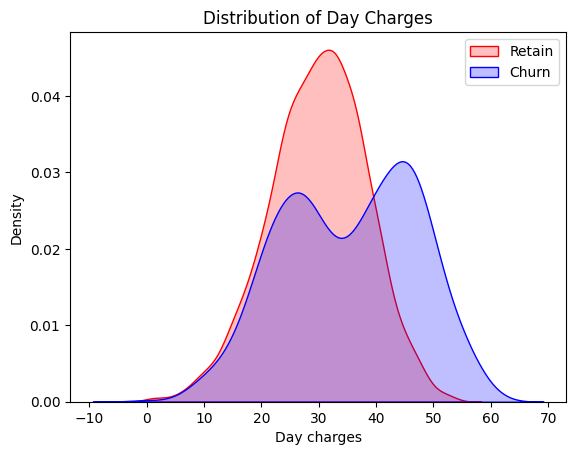

In [15]:
#Kernell density estimate = kde
#churn berdasarkan day charges
#memisahkan total day charge 0 dan 1
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 0)], color = "red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 1)], color = "blue", shade = True)
ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day charges")
ax.set_title("Distribution of Day Charges")

Dapat dilihat bahwa pelanggan akan meninggalkan langganan atau churn ketika nilai day charges melebihi 25 dan 50. Sedangkan untukpelanggan yang tetap atau retain kebanyakan pada nilai 30.

<ipython-input-17-8d5b632f948e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class'] == 0)], color = "red", shade = True)
<ipython-input-17-8d5b632f948e>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class'] == 1)], color = "blue", shade = True)


Text(0.5, 1.0, 'Distribution of Evening Charges')

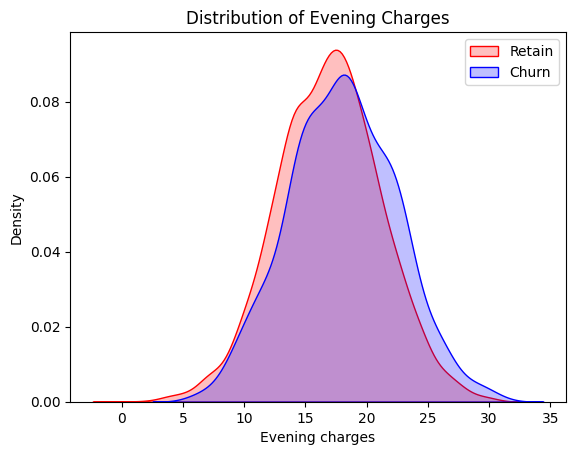

In [17]:
#Kernell density estimate = kde
#churn berdasarkan evening charges
#memisahkan total evening charge 0 dan 1
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class'] == 0)], color = "red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df['class'] == 1)], color = "blue", shade = True)
ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening charges")
ax.set_title("Distribution of Evening Charges")

Berdasarkan penampakan grafik terlihat sedikit perbedaan nilai puncak yang hanya bergeser sedikit, dimana artinya eve charges tidak dapat menjadi variabel baik untuk menjadi predksi churn atau retain

In [19]:
#LATIHAN 3
#fitur yang tidak diperlukan akan menurunkn kecepatan training, interpretasi model, dan knerja generalisasi pada data uji
#maka menemukan dan memilih fitur yang paling berguna dalam kumpulan data sangat penting
#menetappkan fitur input x dan output (churn) ke y
X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") #"area_code", "phone_number" tidak ada hubungannya untuk proses pelatihan
y = telecom_df["class"]

In [20]:
X.shape

(5000, 18)

In [21]:
y.shape

(5000,)

In [22]:
#MEMBAGI DATA TRAIN DAN DATA UJI
from sklearn.model_selection import train_test_split #perlu melatih data train dan mengujinya di data tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150) #data train 70% dan data tes 30%, random state diambil supaya setiap kita menjalankan code ini lagi pembagian xtrain dan x tes nya sama persis, jika tidak dimasukan maka akan berbeda hasilnya

In [23]:
X_train.shape #70% dari 5000 bernilai 3500

(3500, 18)

In [24]:
X_test.shape #30% dari 5000 bernilai 1500

(1500, 18)

In [25]:
#untuk mencari fitur impotance berdasarkan model ML yang terlatih menggunakan metode random forest
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [28]:
rf.feature_importances_ #atribut rf yaitu feat imp mengandung berbagai informasi dari feat imp untuk masing-masing kolom yang dipunya
#bersesuaian dengan masing-masing kolom 0,02 = state, 0,029 = account length, dst

array([0.02314505, 0.03036742, 0.07243017, 0.01920537, 0.02340867,
       0.15751207, 0.02805119, 0.14310028, 0.06102102, 0.02516943,
       0.0658312 , 0.03920612, 0.02766517, 0.04057061, 0.03952076,
       0.04703386, 0.04343903, 0.11332257])

In [29]:
X.columns

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

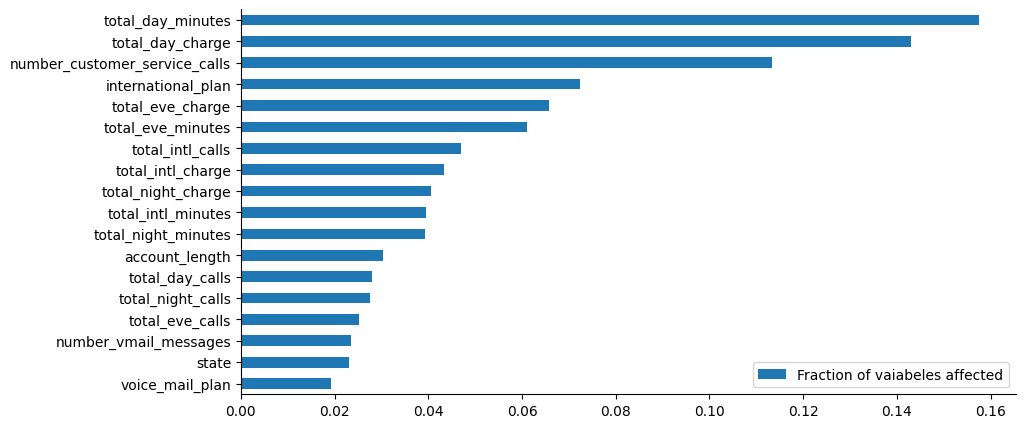

In [30]:
#plot fiture importance
feat_scores = pd.DataFrame({"Fraction of vaiabeles affected" : rf.feature_importances_}, index = X.columns)
feat_scores = feat_scores.sort_values(by = "Fraction of vaiabeles affected")
feat_scores.plot(kind = "barh", figsize = (10,5)) #barh = horizontal bar chart
sns.despine()

In [31]:
#LATIHAN 4
#REGRESI LINIER digunakan untuk memprediksi output pada spektrum kontinyu
#sedangkan REGRESI LOGISTIK digunakan untuk memprediksi keluaran biner dengan nilai 0 atau 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_predict = model_LR.predict(X_test)

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.40      0.08      0.14       201

    accuracy                           0.86      1500
   macro avg       0.64      0.53      0.53      1500
weighted avg       0.81      0.86      0.82      1500



In [35]:
#precision = rasio TP/TP+FP
#recall = rasio TP/TP+FN
#skor f-beta = rata2 harmonik terimbang dari presisi dan perolehan kembali
#dimana skor f-beta mencapai nilai terbaiknya pada 1 dan skor terburuk pada 0

In [36]:
#cetak confusion matrix / cm
cm = confusion_matrix(y_test, y_predict)
cm

array([[1274,   25],
       [ 184,   17]])

<Axes: >

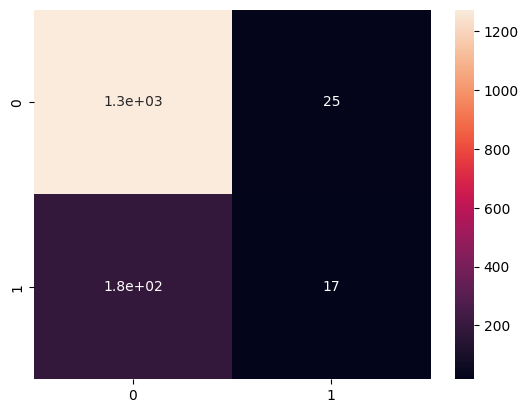

In [37]:
sns.heatmap(cm, annot = True)

Kolom tsb adalah hasil prediksi model nilai=1, dan yang sebenarnya nilai=0.

Model hanya memprediksi 17 sampai 25 yaitu sekitar 42 sampel, artinya presisinya 17/25 = 0,4.

Recall 17/180+17 hanya 17 yang bernilai positif = 0,08
akurasinya besar karena 1300+17/1500 makanya nilainya 0,86, karena modelnya kebanyakan prediksi negatif saja

Cara menghitung f1 score dengan merata2kan presisi dan recall

In [38]:
#LATIHAN 5
#melatih dan mengevaluaasi model klasifikasi Support Vector Machine (SVP)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter = 100000)
model_svc = CalibratedClassifierCV(model_svc)
model_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [39]:
y_predict = model_svc.predict(X_test)

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1299
           1       0.51      0.14      0.22       201

    accuracy                           0.87      1500
   macro avg       0.69      0.56      0.57      1500
weighted avg       0.83      0.87      0.83      1500



<Axes: >

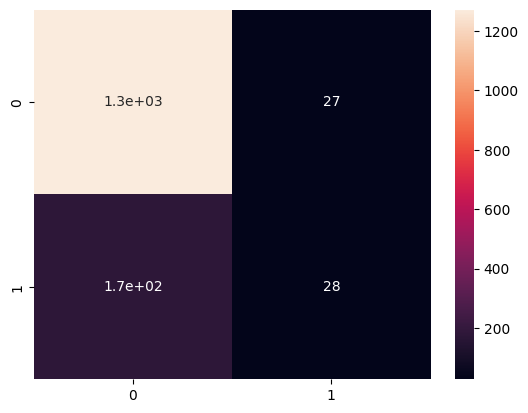

In [41]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [42]:
#LATIHAN 6
#melatih dan mengevaluasi model klasifikasi random forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_predict = model_rf.predict(X_test)

In [44]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.93      0.76      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.96      0.96      0.96      1500



<Axes: >

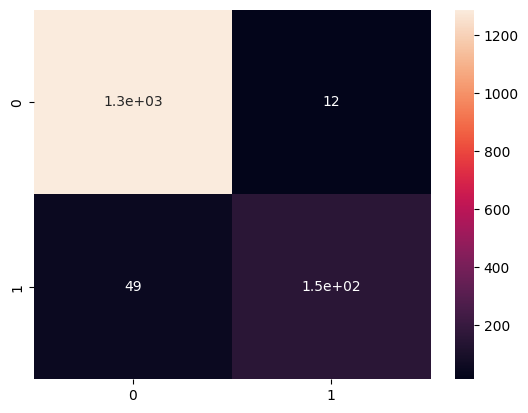

In [45]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [46]:
#LATIHAN 7
#K-nearest neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_predict = model_knn.predict(X_test)

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



<Axes: >

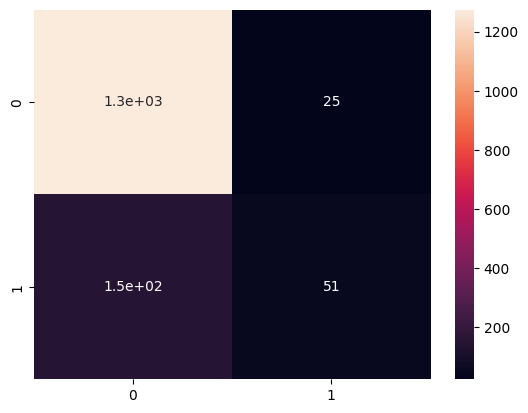

In [49]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [50]:
#LATIHAN 8
#melatih dan mengevaluasi model naive bayes
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [51]:
y_predict = model_gnb.predict(X_test)

In [52]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



<Axes: >

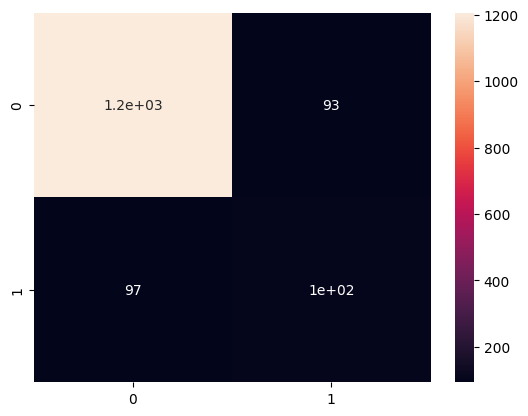

In [53]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [54]:
#LATIHAN 9
#PLOT KURVA RECEIVER OPERATING CURVE
model_LR.predict_proba(X_test)
#elemen pertama ialah probabilitas bahwa keluaran akan menjadi 0
#elemen kedua ialah probabilitas bahwa keluaran akan menjadi 1

array([[0.97399697, 0.02600303],
       [0.92129125, 0.07870875],
       [0.90564741, 0.09435259],
       ...,
       [0.92168469, 0.07831531],
       [0.94362711, 0.05637289],
       [0.97655829, 0.02344171]])

In [55]:
#yang diambil hanya elemen kedua yang probabilitas 1
model_LR.predict_proba(X_test)[:,1] #diambil index 1 atau kolom kedua nya saja

array([0.02600303, 0.07870875, 0.09435259, ..., 0.07831531, 0.05637289,
       0.02344171])

In [56]:
y_test

4827    0
1793    0
2957    0
4218    0
2188    0
       ..
4230    1
3824    0
262     0
1100    0
4359    0
Name: class, Length: 1500, dtype: int64

In [57]:
#untuk membuat kurva roc kita memanggil matriks dari sklearn dan roc curve
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:,1], pos_label = 1)

In [58]:
fpr1 #false positive rate

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 2.30946882e-03,
       2.30946882e-03, 3.07929176e-03, 3.07929176e-03, 4.61893764e-03,
       4.61893764e-03, 7.69822941e-03, 7.69822941e-03, 8.46805235e-03,
       8.46805235e-03, 1.15473441e-02, 1.15473441e-02, 1.53964588e-02,
       1.53964588e-02, 1.61662818e-02, 1.61662818e-02, 1.84757506e-02,
       1.84757506e-02, 1.92455735e-02, 1.92455735e-02, 2.00153965e-02,
       2.00153965e-02, 2.15550423e-02, 2.15550423e-02, 2.46343341e-02,
       2.46343341e-02, 2.77136259e-02, 2.77136259e-02, 2.92532717e-02,
       2.92532717e-02, 3.07929176e-02, 3.07929176e-02, 3.69515012e-02,
       3.69515012e-02, 4.00307929e-02, 4.00307929e-02, 4.15704388e-02,
       4.15704388e-02, 4.23402617e-02, 4.23402617e-02, 4.38799076e-02,
       4.38799076e-02, 4.46497306e-02, 4.46497306e-02, 4.54195535e-02,
       4.54195535e-02, 4.61893764e-02, 4.61893764e-02, 4.84988453e-02,
       4.84988453e-02, 5.08083141e-02, 5.08083141e-02, 5.31177829e-02,
      

In [59]:
tpr1 #true positive rate

array([0.        , 0.        , 0.00497512, 0.00497512, 0.00995025,
       0.00995025, 0.01492537, 0.01492537, 0.0199005 , 0.0199005 ,
       0.03482587, 0.03482587, 0.039801  , 0.039801  , 0.04477612,
       0.04477612, 0.06467662, 0.06467662, 0.06965174, 0.06965174,
       0.08457711, 0.08457711, 0.08955224, 0.08955224, 0.09452736,
       0.09452736, 0.09950249, 0.09950249, 0.10945274, 0.10945274,
       0.11442786, 0.11442786, 0.11940299, 0.11940299, 0.12437811,
       0.12437811, 0.12935323, 0.12935323, 0.13432836, 0.13432836,
       0.14925373, 0.14925373, 0.15422886, 0.15422886, 0.15920398,
       0.15920398, 0.16915423, 0.16915423, 0.17412935, 0.17412935,
       0.1840796 , 0.1840796 , 0.18905473, 0.18905473, 0.2039801 ,
       0.2039801 , 0.20895522, 0.20895522, 0.2238806 , 0.2238806 ,
       0.23880597, 0.23880597, 0.25373134, 0.25373134, 0.25870647,
       0.25870647, 0.26368159, 0.26368159, 0.26865672, 0.26865672,
       0.27363184, 0.27363184, 0.28358209, 0.28358209, 0.28855

In [60]:
thresh1 #threshold

array([1.84557534, 0.84557534, 0.82973104, 0.76512672, 0.76320056,
       0.7472222 , 0.73544339, 0.72454579, 0.72430917, 0.68024247,
       0.659788  , 0.65247   , 0.63533555, 0.6009367 , 0.58554973,
       0.5465333 , 0.52916031, 0.52632429, 0.52458996, 0.51911935,
       0.50662982, 0.5063773 , 0.49504427, 0.49357758, 0.49140084,
       0.48520811, 0.4835081 , 0.47215181, 0.47032575, 0.46533193,
       0.45770863, 0.45492009, 0.45404044, 0.44782399, 0.43877416,
       0.41620029, 0.41602295, 0.41252623, 0.40940053, 0.40821668,
       0.40194751, 0.40187879, 0.40111314, 0.39590506, 0.39396179,
       0.39332564, 0.39163498, 0.39082489, 0.3894548 , 0.3887943 ,
       0.38468101, 0.3828992 , 0.38277544, 0.37651966, 0.37338179,
       0.37132219, 0.37057138, 0.3541155 , 0.3529204 , 0.34766113,
       0.34617766, 0.34272423, 0.33966104, 0.33616273, 0.33521886,
       0.32617354, 0.32603931, 0.32272879, 0.32179672, 0.31592737,
       0.31486846, 0.31483799, 0.31250589, 0.30777184, 0.30743

In [61]:
#dilakukan percobaan untuk semua metode
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:,1], pos_label = 1)
fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, model_svc.predict_proba(X_test)[:,1], pos_label = 1)
fpr3, tpr3, thresh3 = metrics.roc_curve(y_test, model_rf.predict_proba(X_test)[:,1], pos_label = 1)
fpr4, tpr4, thresh4 = metrics.roc_curve(y_test, model_knn.predict_proba(X_test)[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = metrics.roc_curve(y_test, model_gnb.predict_proba(X_test)[:,1], pos_label = 1)

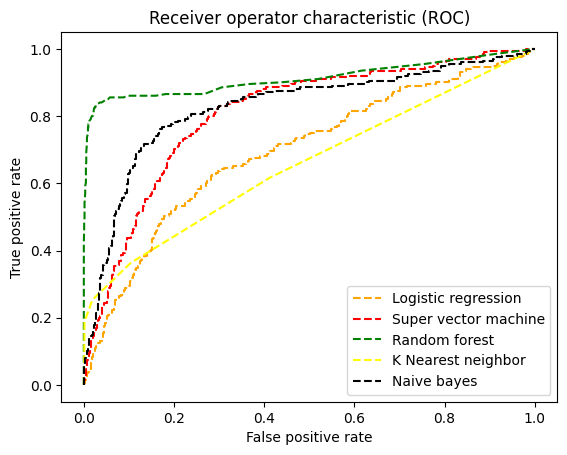

In [62]:
#plot kurva roc
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "Super vector machine")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "K Nearest neighbor")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "Naive bayes")

plt.title('Receiver operator characteristic (ROC)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

Berdasarkan hasilnya dapat disimpulkan bahwa metode random forest dikatakan yang paling baik untuk data ini karna kurva AUC nya paling baik. RF melakukan pekerjaan yang lebih baik dalam klasifikasi pelanggan yang churn/retain

In [63]:
#LATIHAN 10
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.93      0.76      0.83       201

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.96      0.96      0.96      1500



Diantara semua model yang dilatih, algoritma rf menghasilkan area tertinggi dibawah kurva ROC(AUC). Skor yang dihasilkan yaitu :

*akurasi 96%

*precision 96% : retain, 93% : churn

*recall 99% : retain, 76% : churn